In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install yfinance

In [3]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import yfinance as yf

In [4]:
#Downloading Data
Data = yf.download ('MSFT', start = '2010-01-01', end = '2023-12-31')

[*********************100%***********************]  1 of 1 completed


In [5]:
Data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,23.347324,38409100
2010-01-05,30.850000,31.100000,30.639999,30.959999,23.354858,49749600
2010-01-06,30.879999,31.080000,30.520000,30.770000,23.211538,58182400
2010-01-07,30.629999,30.700001,30.190001,30.450001,22.970142,50559700
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.128557,51197400


In [6]:
Data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,373.679993,375.179993,372.709991,374.579987,372.543915,17091100
2023-12-26,375.000000,376.940002,373.500000,374.660004,372.623505,12673100
2023-12-27,373.690002,375.059998,372.809998,374.070007,372.036713,14905400
2023-12-28,375.369995,376.459991,374.160004,375.279999,373.240112,14327000
2023-12-29,376.000000,377.160004,373.480011,376.040009,373.995972,18723000


In [7]:
print(Data.index)

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=3522, freq=None)


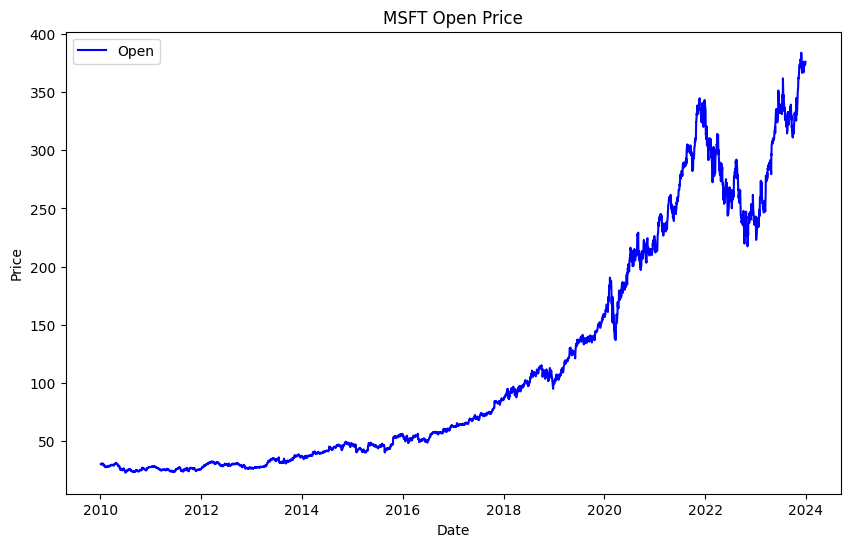

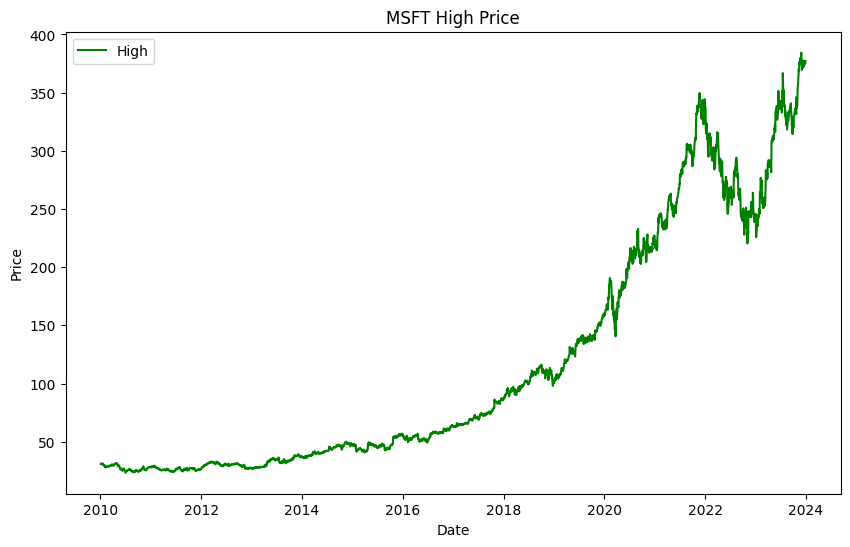

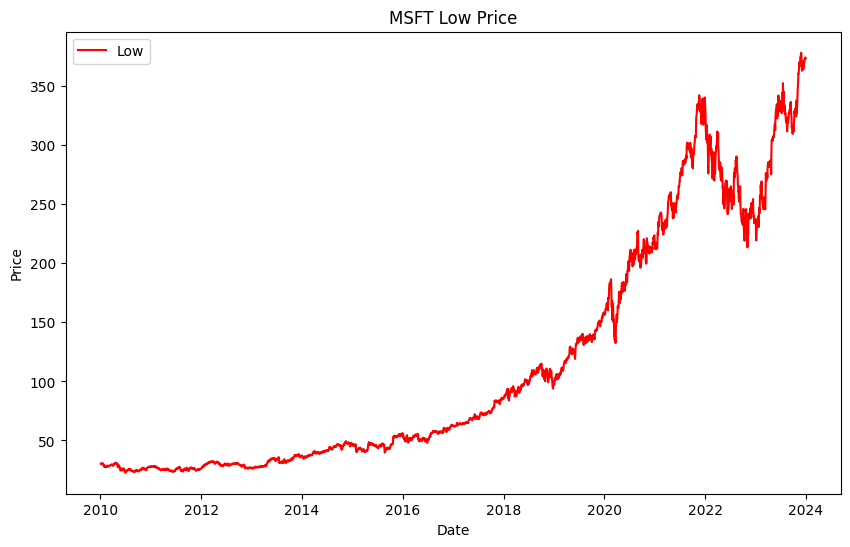

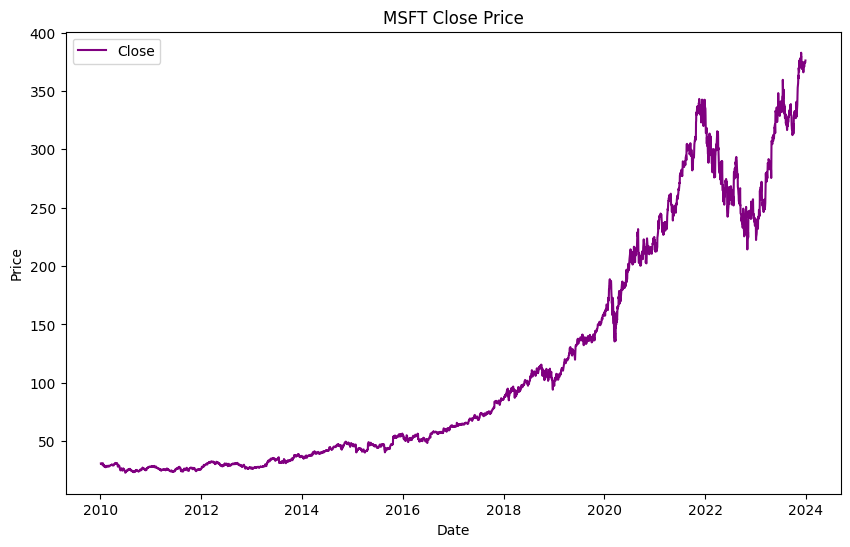

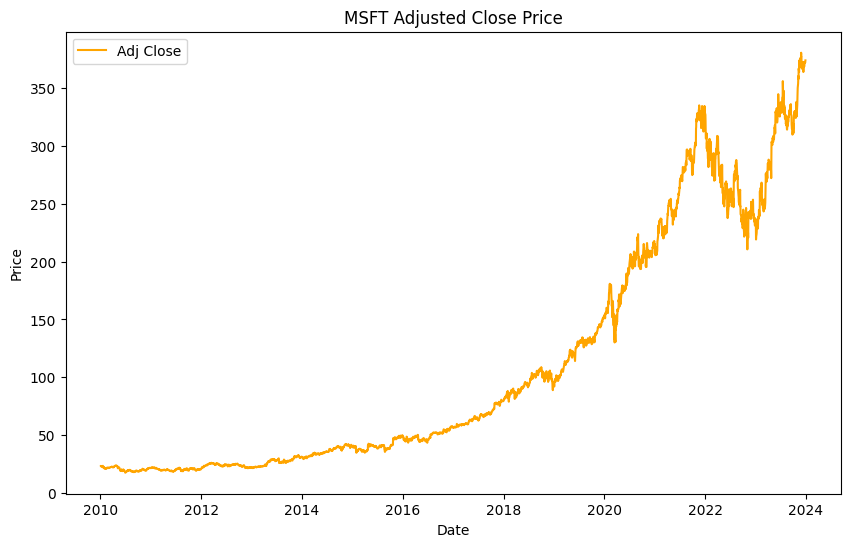

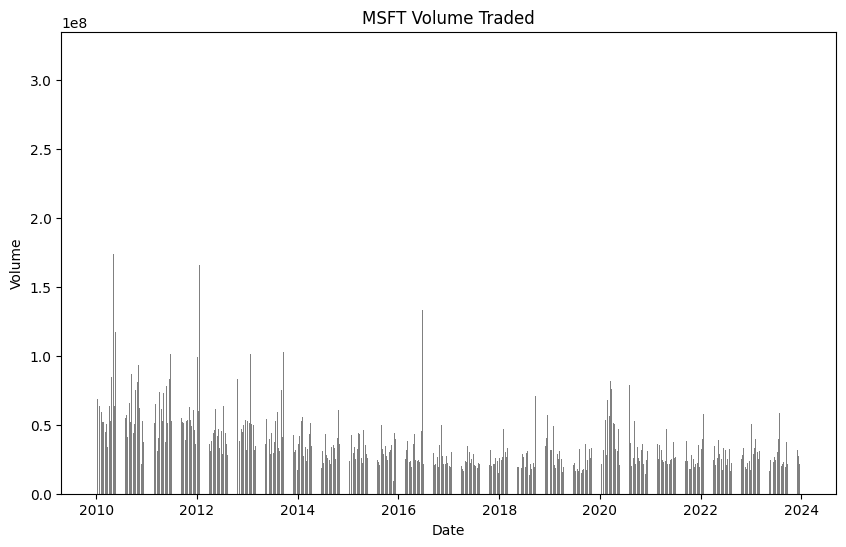

In [8]:
#Plotting the necessary plots to visualize data
import matplotlib.pyplot as plt


# Plot the 'Open' price
plt.figure(figsize=(10, 6))
plt.plot(Data.index, Data['Open'], label='Open', color='blue')
plt.title('MSFT Open Price')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

# Plot the 'High' price
plt.figure(figsize=(10, 6))
plt.plot(Data.index, Data['High'], label='High', color='green')
plt.title('MSFT High Price')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

# Plot the 'Low' price
plt.figure(figsize=(10, 6))
plt.plot(Data.index, Data['Low'], label='Low', color='red')
plt.title('MSFT Low Price')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

# Plot the 'Close' price
plt.figure(figsize=(10, 6))
plt.plot(Data.index, Data['Close'], label='Close', color='purple')
plt.title('MSFT Close Price')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

# Plot the 'Adj Close' price
plt.figure(figsize=(10, 6))
plt.plot(Data.index, Data['Adj Close'], label='Adj Close', color='orange')
plt.title('MSFT Adjusted Close Price')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

# Plot the 'Volume'
plt.figure(figsize=(10, 6))
plt.bar(Data.index, Data['Volume'], color='grey')
plt.title('MSFT Volume Traded')
plt.ylabel('Volume')
plt.xlabel('Date')
plt.show()


In [9]:
#Determining different technical features of the data

# Simple Moving Average (SMA),The SMA is the unweighted mean of the previous n closing prices.
Data['SMA'] = Data['Close'].rolling(window=20).mean()

# Exponential Moving Average (EMA), EMA is a type of moving average that gives more weight to recent prices, making it more responsive to new information.
Data['EMA'] = Data['Close'].ewm(span=20, adjust=False).mean()

# Relative Strength Index (RSI), RSI momentum oscillator that measures the speed and change of price movements. It ranges from 0 to 100, with overbought conditions typically considered above 70 and oversold conditions below 30.
delta = Data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
RS = gain / loss
Data['RSI'] = 100 - (100 / (1 + RS))

# Moving Average Convergence Divergence (MACD), MACD is a trend-following momentum indicator that shows the relationship between two moving averages of a stock’s price.
EMA12 = Data['Close'].ewm(span=12, adjust=False).mean()
EMA26 = Data['Close'].ewm(span=26, adjust=False).mean()
Data['MACD'] = EMA12 - EMA26
Data['Signal Line'] = Data['MACD'].ewm(span=9, adjust=False).mean()

# Bollinger Bands
Data['Middle Band'] = Data['Close'].rolling(window=20).mean()
Data['Upper Band'] = Data['Middle Band'] + 2*Data['Close'].rolling(window=20).std()
Data['Lower Band'] = Data['Middle Band'] - 2*Data['Close'].rolling(window=20).std()

# Stochastic Oscillator
Data['L14'] = Data['Low'].rolling(window=14).min()
Data['H14'] = Data['High'].rolling(window=14).max()
Data['%K'] = (Data['Close'] - Data['L14']) * 100 / (Data['H14'] - Data['L14'])
Data['%D'] = Data['%K'].rolling(window=3).mean()

# Average True Range (ATR)
Data['TR'] = Data[['High', 'Low', 'Close']].max(axis=1) - Data[['High', 'Low', 'Close']].min(axis=1)  # True Range calculation
Data['ATR'] = Data['TR'].rolling(window=14).mean()

# On-Balance Volume (OBV)
Data['OBV'] = (np.sign(Data['Close'].diff()) * Data['Volume']).fillna(0).cumsum()

# Drop NaN values resulting from rolling calculations
Data.dropna(inplace=True)

In [10]:
Data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,EMA,RSI,MACD,...,Middle Band,Upper Band,Lower Band,L14,H14,%K,%D,TR,ATR,OBV
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-01,28.389999,28.480000,27.920000,28.410000,21.431257,85931100,30.0600,29.817415,34.499995,-0.555363,...,30.0600,31.828246,28.291754,27.66,31.24,20.949721,16.269399,0.559999,0.825714,-322157300.0
2010-02-02,28.370001,28.500000,28.139999,28.459999,21.468971,54413700,29.9355,29.688137,36.239307,-0.592524,...,29.9355,31.788503,28.082497,27.66,31.24,22.346348,19.273741,0.360001,0.816429,-267743600.0
2010-02-03,28.260000,28.790001,28.120001,28.629999,21.597214,61397900,29.8190,29.587362,35.017405,-0.601325,...,29.8190,31.693650,27.944350,27.66,31.24,27.094953,23.463674,0.670000,0.827857,-206345700.0
2010-02-04,28.379999,28.500000,27.809999,27.840000,21.001276,77850000,29.6725,29.420946,23.648650,-0.664387,...,29.6725,31.686962,27.658037,27.66,31.24,5.027942,18.156414,0.690001,0.817143,-284195700.0
2010-02-05,28.000000,28.280001,27.570000,28.020000,21.137056,80960100,29.5510,29.287523,26.333332,-0.691865,...,29.5510,31.658969,27.443031,27.57,31.24,12.261601,14.794832,0.710001,0.830000,-203235600.0


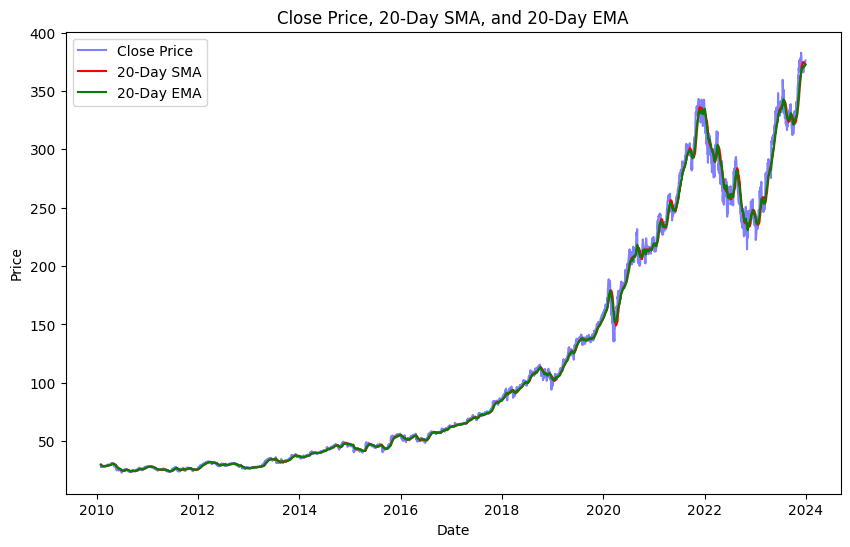

In [11]:
# Plotting
plt.figure(figsize=(10, 6))

# Plotting the closing price
plt.plot(Data.index, Data['Close'], label='Close Price', color='blue', alpha=0.5)

# Plotting the Simple Moving Average (SMA)
plt.plot(Data.index, Data['SMA'], label='20-Day SMA', color='red')

# Plotting the Exponential Moving Average (EMA)
plt.plot(Data.index, Data['EMA'], label='20-Day EMA', color='green')

# Adding titles and labels
plt.title('Close Price, 20-Day SMA, and 20-Day EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.show()

In [12]:
#convert the Date column into a pandas datatime format
Data.index = pd.to_datetime(Data.index)

**Feature Selection**

In [13]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Assuming 'Data' already has the technical indicators calculated earlier and 'Close' column

# Extract features (technical indicators + Close price) and target (Close price)
features = [ 'SMA', 'EMA', 'RSI', 'MACD', 'Signal Line', 'Low', 'High','Volume','Adj Close','Open',
            'Middle Band', 'Upper Band', 'Lower Band', '%K', '%D', 'ATR', 'OBV']

X = Data[features].values
y = Data['Close'].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the machine learning model (Random Forest Regressor)
model = RandomForestRegressor(random_state=42)

# Specify the number of features you want to retain
num_features_to_retain = 6

# Initialize the RFE selector with the model and the number of features to retain
rfe = RFE(estimator=model, n_features_to_select=num_features_to_retain)

# Fit the RFE selector to your data
rfe.fit(X_scaled, y)

# Get the selected features
selected_features = np.where(rfe.support_)[0]

# Print selected feature indices and names
print("Selected feature indices:", selected_features)
print("Selected feature names:", [features[i] for i in selected_features])

# Evaluate model performance with the selected features using cross-validation
# Use MSE as the scoring metric for regression
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
scores = cross_val_score(model, X_scaled[:, selected_features], y, cv=5, scoring=mse_scorer)
mean_mse = np.mean(scores)

#print(f"Mean MSE with Selected Features: {mean_mse:.4f}")


Selected feature indices: [ 5  6  8  9 10 11]
Selected feature names: ['Low', 'High', 'Adj Close', 'Open', 'Middle Band', 'Upper Band']


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'Data' already has the technical indicators and 'Close' column
# Extract features (technical indicators + Close price) and target (Binary target variable)
features = [ 'SMA', 'EMA', 'RSI', 'MACD', 'Signal Line', 'Low', 'High','Volume','Adj Close','Open',
            'Middle Band', 'Upper Band', 'Lower Band', '%K', '%D', 'ATR', 'OBV']

X = Data[features]
y = Data['Close']  # Replace 'Target' with your actual target column

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=340, random_state=42)
model.fit(X_scaled, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)


        Feature  Importance
8     Adj Close    0.807962
6          High    0.061115
5           Low    0.053046
9          Open    0.044486
10  Middle Band    0.009300
11   Upper Band    0.008603
0           SMA    0.007641
1           EMA    0.007510
16          OBV    0.000299
12   Lower Band    0.000023
15          ATR    0.000004
13           %K    0.000003
4   Signal Line    0.000002
3          MACD    0.000002
7        Volume    0.000002
14           %D    0.000002
2           RSI    0.000002


In [15]:
from sklearn.preprocessing import MinMaxScaler
# rescale the whole dataset (ideally this shoud be done seperately on the train and test data in order to prevent data leakage, in particular 'look-ahead bias')
scaler = MinMaxScaler(feature_range=(0, 1))
#train_series = scaler.fit_transform(train_series)
data_scaled = scaler.fit_transform(Data)

In [16]:
# Convert scaled data back to DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=Data.columns, index=Data.index)

In [17]:
data_scaled

,Open,High,Low,Close,Adj Close,Volume,SMA,EMA,RSI,MACD,...,Middle Band,Upper Band,Lower Band,L14,H14,%K,%D,TR,ATR,OBV
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-01,0.014695,0.014294,0.014602,0.015013,0.010778,0.251707,0.016971,0.016140,0.300725,0.425046,...,0.016971,0.019225,0.016855,0.014366,0.018351,0.209497,0.148936,0.016762,0.049511,0.712056
2010-02-02,0.014639,0.014350,0.015221,0.015152,0.010882,0.150655,0.016616,0.015769,0.319549,0.423278,...,0.016616,0.019116,0.016248,0.014366,0.018351,0.223463,0.179925,0.008585,0.048651,0.725396
2010-02-03,0.014334,0.015153,0.015165,0.015625,0.011235,0.173048,0.016283,0.015480,0.306325,0.422859,...,0.016283,0.018856,0.015848,0.014366,0.018351,0.270950,0.223142,0.021259,0.049709,0.740449
2010-02-04,0.014667,0.014350,0.014293,0.013428,0.009594,0.225797,0.015865,0.015002,0.183284,0.419858,...,0.015865,0.018838,0.015018,0.014366,0.018351,0.050279,0.168400,0.022077,0.048718,0.721363
2010-02-05,0.013614,0.013740,0.013617,0.013929,0.009968,0.235769,0.015518,0.014619,0.212340,0.418551,...,0.015518,0.018762,0.014394,0.014104,0.018351,0.122616,0.133726,0.022895,0.049907,0.741212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,0.972052,0.974735,0.984666,0.977425,0.977759,0.030990,0.997122,0.996513,0.540416,0.582874,...,0.997122,0.975646,0.994636,0.994842,0.981483,0.773499,0.669192,0.094849,0.482946,0.961767
2023-12-26,0.975712,0.979611,0.986889,0.977647,0.977978,0.016825,0.996558,0.997405,0.499259,0.581277,...,0.996558,0.974169,0.995056,0.994842,0.981483,0.779422,0.763235,0.134506,0.456372,0.964874
2023-12-27,0.972080,0.974403,0.984948,0.976007,0.976362,0.023982,0.995327,0.998050,0.551161,0.576308,...,0.995327,0.969203,0.997818,0.994842,0.981483,0.735751,0.768016,0.085855,0.430593,0.961220


In [18]:
# Define target and features
target_column = 'Close'
feature_columns = ['Close','SMA', 'Adj Close', 'High', 'Low', 'Open','Upper Band']

# Create features and target DataFrames
X = data_scaled[feature_columns]
y = data_scaled[target_column]

# Determine split indices
total_data_points = len(data_scaled)
train_end = int(total_data_points * 0.80)
test_end = int(total_data_points * 0.9)

# Split the features and target
X_train = X.iloc[:train_end]
X_test = X.iloc[train_end:test_end]
X_predict = X.iloc[test_end:]

y_train = y.iloc[:train_end]
y_test = y.iloc[train_end:test_end]
y_predict = y.iloc[test_end:]

# Print to verify
print("Training features:\n", X_train.head())
print("Testing features:\n", X_test.head())
print("Prediction features:\n", X_predict.head())
print("Training target:\n", y_train.head())
print("Testing target:\n", y_test.head())
print("Prediction target:\n", y_predict.head())

#Verifying the features of the data
print("Columns in data_train:", X_train.columns)
print("Columns in data_test:", X_test.columns)
print("Columns in data_predict:", X_predict.columns)


Training features:
                Close       SMA  Adj Close      High       Low      Open  \
Date                                                                      
2010-02-01  0.015013  0.016971   0.010778  0.014294  0.014602  0.014695   
2010-02-02  0.015152  0.016616   0.010882  0.014350  0.015221  0.014639   
2010-02-03  0.015625  0.016283   0.011235  0.015153  0.015165  0.014334   
2010-02-04  0.013428  0.015865   0.009594  0.014350  0.014293  0.014667   
2010-02-05  0.013929  0.015518   0.009968  0.013740  0.013617  0.013614   

            Upper Band  
Date                    
2010-02-01    0.019225  
2010-02-02    0.019116  
2010-02-03    0.018856  
2010-02-04    0.018838  
2010-02-05    0.018762  
Testing features:
                Close       SMA  Adj Close      High       Low      Open  \
Date                                                                      
2021-03-19  0.576441  0.595740   0.567615  0.579395  0.581324  0.576510   
2021-03-22  0.592121  0.595951   0.

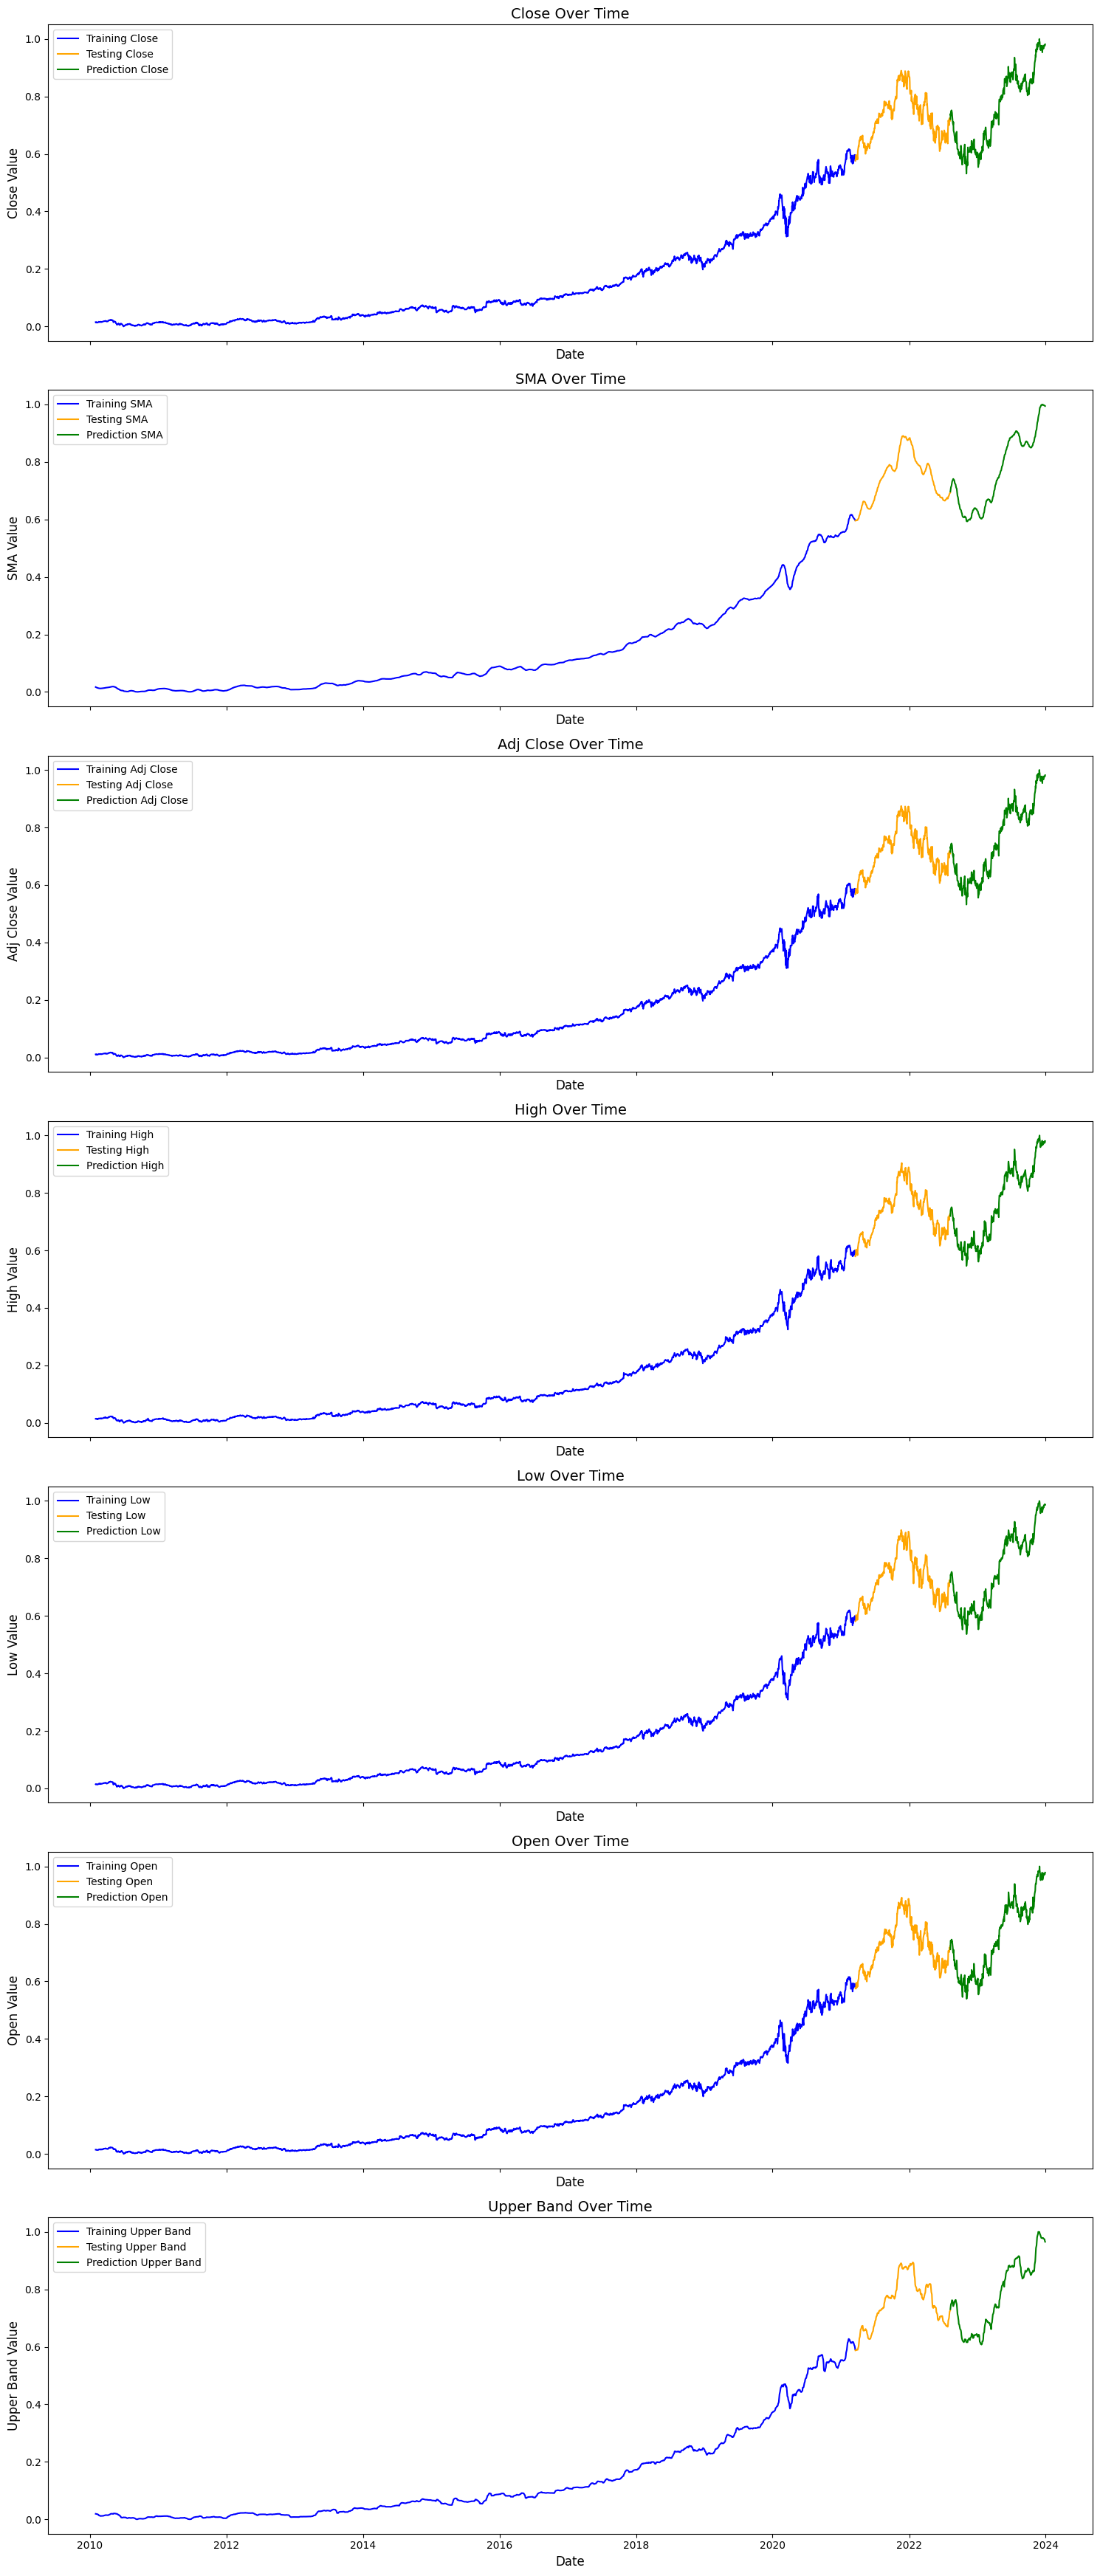

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the index is in datetime format
data_scaled.index = pd.to_datetime(data_scaled.index)

# Define feature columns and target column
feature_columns = ['Close','SMA', 'Adj Close', 'High', 'Low', 'Open','Upper Band']
target_column = 'Close'

# Initialize the subplot grid
n_features = len(feature_columns)
fig, axes = plt.subplots(n_features, 1, figsize=(15, 5 * n_features), sharex=True)

# Plot each feature
for i, feature in enumerate(feature_columns):
    ax = axes[i]
    ax.plot(data_scaled.index[:train_end], X_train[feature], label=f'Training {feature}', color='blue')
    ax.plot(data_scaled.index[train_end:test_end], X_test[feature], label=f'Testing {feature}', color='orange')
    ax.plot(data_scaled.index[test_end:], X_predict[feature], label=f'Prediction {feature}', color='green')

    # Adding labels and title for each subplot
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel(f"{feature} Value", fontsize=12)
    ax.set_title(f"{feature} Over Time", fontsize=14)
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


In [20]:
#Importing necessary libraries
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras import regularizers


In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Define look-back period and prediction horizon
n_past = 30
n_future = 1 #was 1

# Determine split indices
total_data_points = len(data_scaled)
train_end = int(total_data_points * 0.80)
test_end = int(total_data_points * 0.90) # was 0.90

# Split the data
data_train = data_scaled.iloc[:train_end]
data_test = data_scaled.iloc[train_end:test_end]
data_predict = data_scaled.iloc[test_end:]

# Reformat input data into a shape: (n_samples x timesteps x n_features)
def create_timeseries_data(data, feature_columns, target_column, n_past, n_future):
    X, y = [], []
    for i in range(n_past, len(data) - n_future + 1):
        X.append(data.iloc[i - n_past:i][feature_columns].values)
        y.append(data.iloc[i + n_future - 1:i + n_future][target_column].values)
    return np.array(X), np.array(y)

# Create training, testing, and prediction data
X_train, y_train = create_timeseries_data(data_train, feature_columns, target_column, n_past, n_future)
X_test, y_test = create_timeseries_data(data_test, feature_columns, target_column, n_past, n_future)
X_predict, _ = create_timeseries_data(data_predict, feature_columns, target_column, n_past, n_future)

print('trainX shape == {}.'.format(X_train.shape))
print('trainY shape == {}.'.format(y_train.shape))
print('testX shape == {}.'.format(X_test.shape))
print('testY shape == {}.'.format(y_test.shape))
print('predictX shape == {}.'.format(X_predict.shape))


trainX shape == (2772, 30, 7).
trainY shape == (2772, 1).
testX shape == (320, 30, 7).
testY shape == (320, 1).
predictX shape == (321, 30, 7).


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Define the LSTM model

model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), #150
               return_sequences=False ))
#model.add(LSTM(50, activation='relu', return_sequences=False))
model.add(Dropout(0.5))  # Increased dropout rate#0.4
model.add(Dense(y_train.shape[1]))

# Create the Adam optimizer with a smaller learning rate
optimizer = Adam(learning_rate=0.0001)  # You can adjust the learning rate as needed

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')

# Predict with the unseen data
predictions = model.predict(X_predict)
print(predictions)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 0.0037 - val_loss: 0.0019
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 3.1073e-04 - val_loss: 4.8954e-04
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - loss: 3.0516e-04 - val_loss: 3.4299e-04
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 2.5447e-04 - val_loss: 6.1776e-04
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 2.2323e-04 - val_loss: 4.6449e-04
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - loss: 1.9835e-04 - val_loss: 4.0721e-04
Epoch 7/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 1.8325e-04 - val_loss: 3.2398e-04
Epoch 8/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 1.8813e-04 - val_loss: 4.6276e-04
Epoch 9/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 1.6345e-04 - val_loss: 4.7575e-04
Epoch 10/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 1.7291e-04 - val_loss: 3.1235e-04
Epoch 11/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss

Epoch 1/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.0031 - val_loss: 5.3530e-04
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 2.7760e-04 - val_loss: 4.5233e-04
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 2.5422e-04 - val_loss: 4.3131e-04
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 2.4863e-04 - val_loss: 6.1534e-04
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 2.1022e-04 - val_loss: 3.1906e-04
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 1.7762e-04 - val_loss: 4.1858e-04
Epoch 7/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 1.7130e-04 - val_loss: 2.7972e-04
Epoch 8/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 1.5794e-04 - val_loss: 5.6394e-04
Epoch 9/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 1.3581e-04 - val_loss: 2.6708e-04
Epoch 10/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 1.6068e-04 - val_loss: 2.6030e-04
Epoch 11/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/st

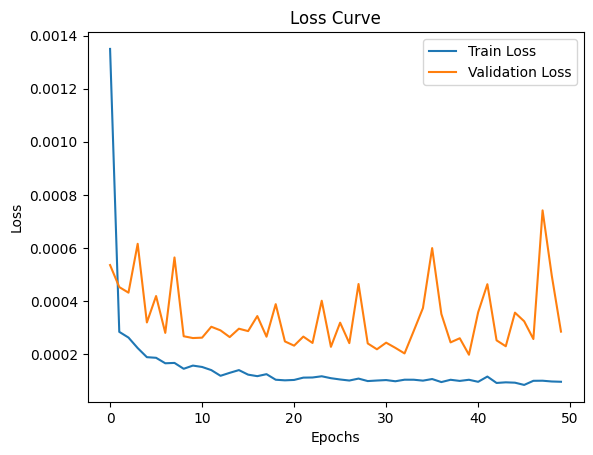

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define the LSTM model
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dropout(0.5))  # Increased dropout rate
model.add(Dense(y_train.shape[1]))

# Create the Adam optimizer with a smaller learning rate
optimizer = Adam(learning_rate=0.0001)

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model and capture the history
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')

# Predict with the unseen data
predictions = model.predict(X_predict)
print(predictions)

# Function to plot the training and validation loss
def plot_loss(history):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Plot the loss curves
plot_loss(history)


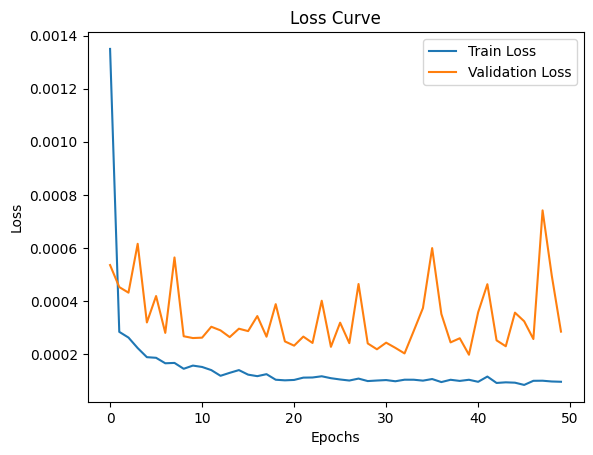

In [24]:
import matplotlib.pyplot as plt

# After model training is complete, plot the training and validation loss
def plot_loss(history):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Plot the loss curves
plot_loss(history)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Length of time_index: 320
Length of y_test_actual: 320
Length of y_test_pred_rescaled: 320


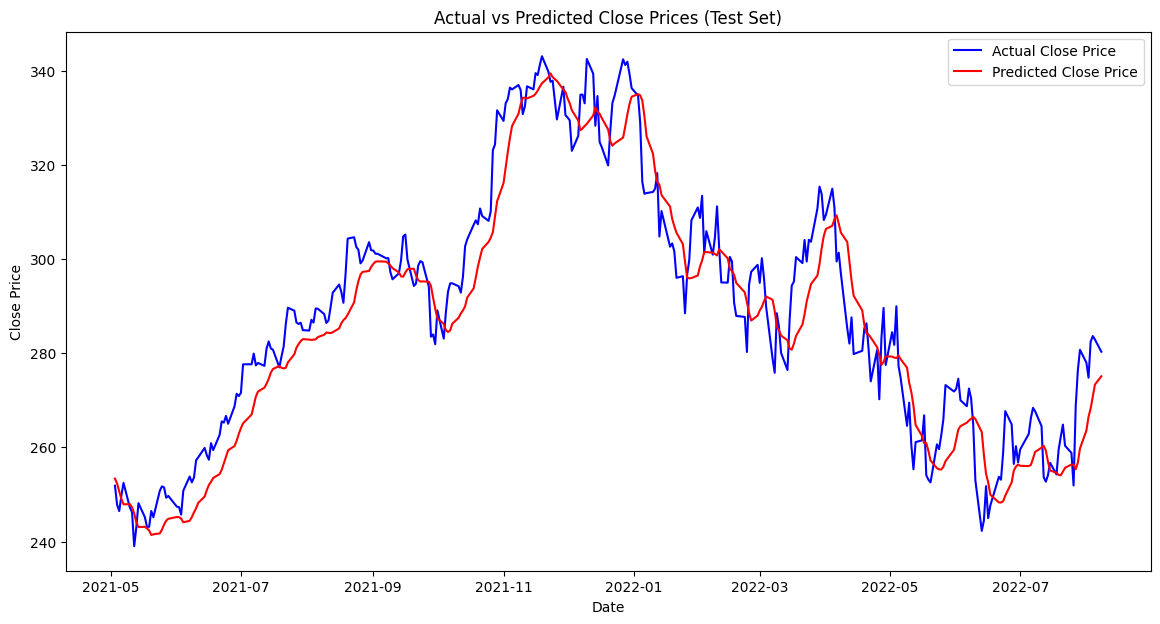

In [25]:
# Predict with the test data and unseen data
y_test_pred = model.predict(X_test)
y_predict = model.predict(X_predict)

# Inverse transform the scaled data
scaler_close = MinMaxScaler(feature_range=(0, 1))
scaler_close.fit(Data[['Close']])
y_test_actual = scaler_close.inverse_transform(y_test.reshape(-1, 1))
y_test_pred_rescaled = scaler_close.inverse_transform(y_test_pred)
y_predict_rescaled = scaler_close.inverse_transform(y_predict)

# Adjust time index based on the length of y_test_actual
time_index = Data.index[train_end + n_past: train_end + n_past + len(y_test_actual)]

# Print lengths for debugging
print(f'Length of time_index: {len(time_index)}')
print(f'Length of y_test_actual: {len(y_test_actual)}')
print(f'Length of y_test_pred_rescaled: {len(y_test_pred_rescaled)}')

# Ensure lengths match
if len(time_index) == len(y_test_actual) == len(y_test_pred_rescaled):
    # Plot actual vs predicted close prices for the test set
    plt.figure(figsize=(14, 7))
    plt.plot(time_index, y_test_actual, color='blue', label='Actual Close Price')
    plt.plot(time_index, y_test_pred_rescaled, color='red', label='Predicted Close Price')
    plt.title('Actual vs Predicted Close Prices (Test Set)')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()
else:
    print("Length mismatch persists.")

NEW BLOCK


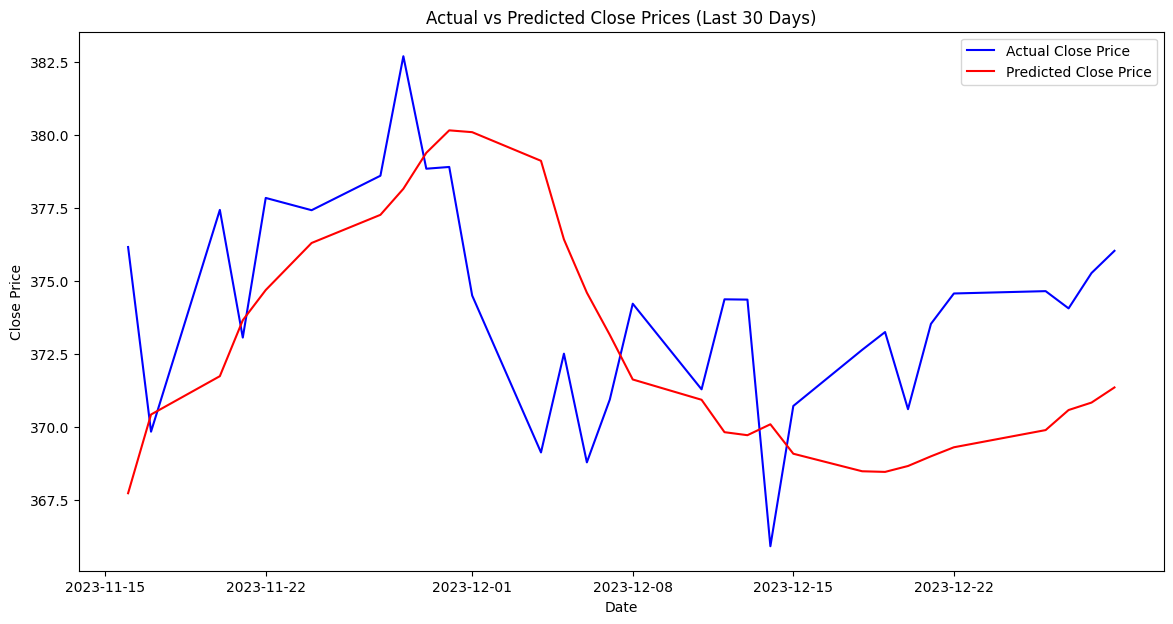

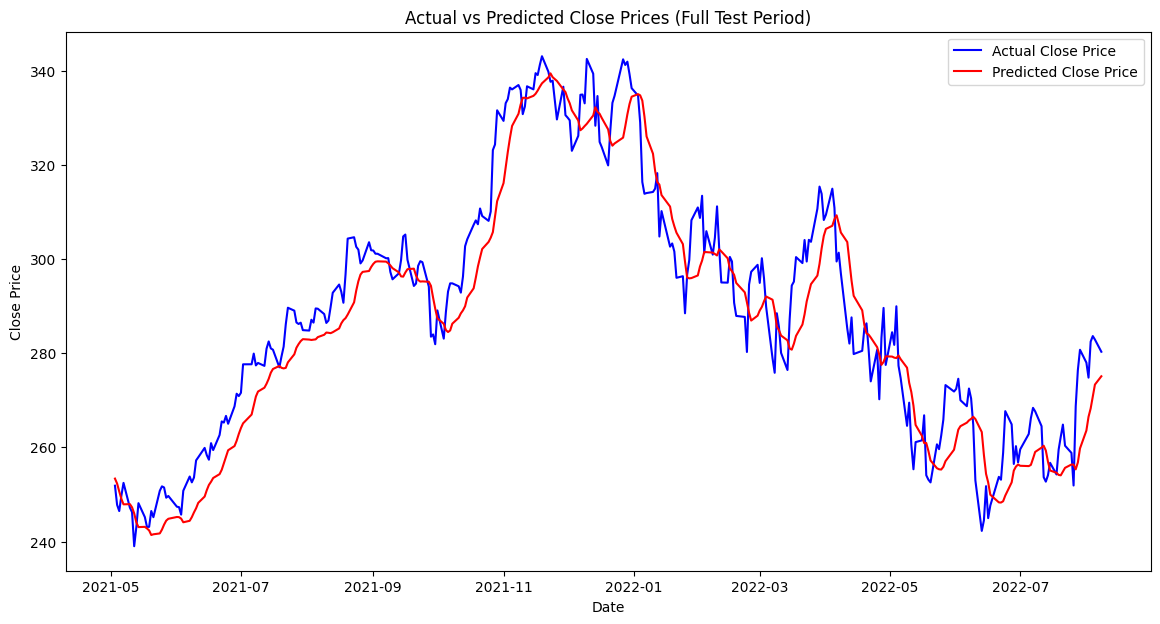

In [33]:
import matplotlib.pyplot as plt

# Plot the prediction of the last 30 days against the original data
plt.figure(figsize=(14, 7))

# Select the last 30 days from the predictions and the corresponding actual data
last_30_days = 30
plt.plot(Data.index[-last_30_days:], Data['Close'].iloc[-last_30_days:], color='blue', label='Actual Close Price')
plt.plot(Data.index[-last_30_days:], y_predict_rescaled[-last_30_days:], color='red', label='Predicted Close Price')

plt.title('Actual vs Predicted Close Prices (Last 30 Days)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Plot the full time scale prediction with respect to the original data
plt.figure(figsize=(14, 7))

# Use the entire test period for plotting
plt.plot(Data.index[train_end + n_past:test_end], Data['Close'].iloc[train_end + n_past:test_end], color='blue', label='Actual Close Price')
plt.plot(Data.index[train_end + n_past:test_end], y_test_pred_rescaled, color='red', label='Predicted Close Price')

plt.title('Actual vs Predicted Close Prices (Full Test Period)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


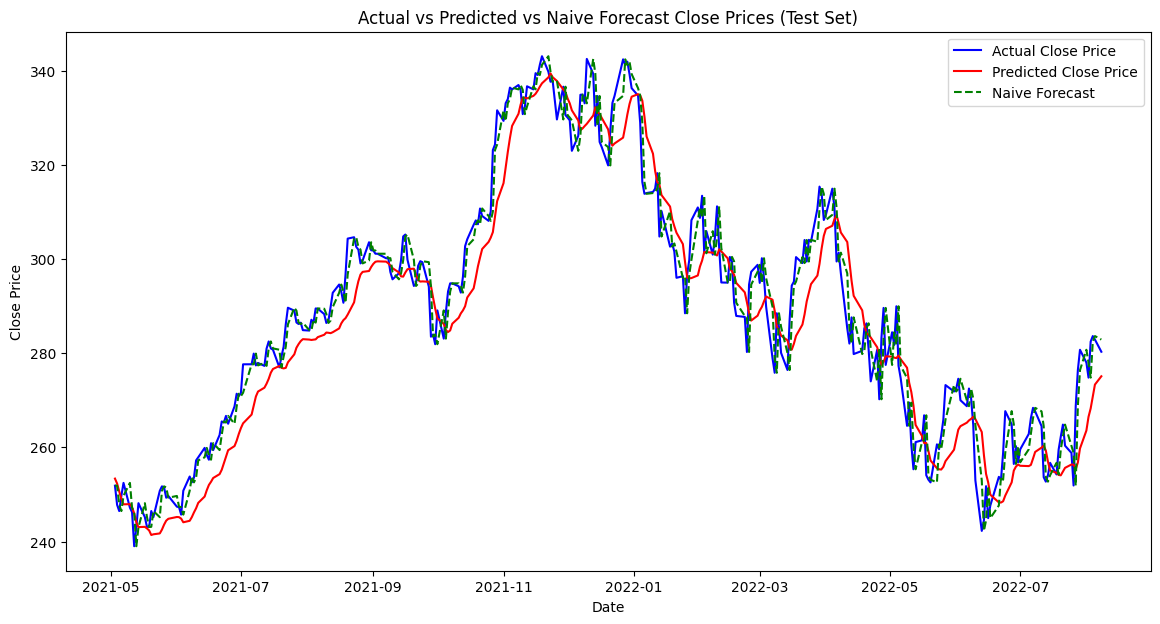

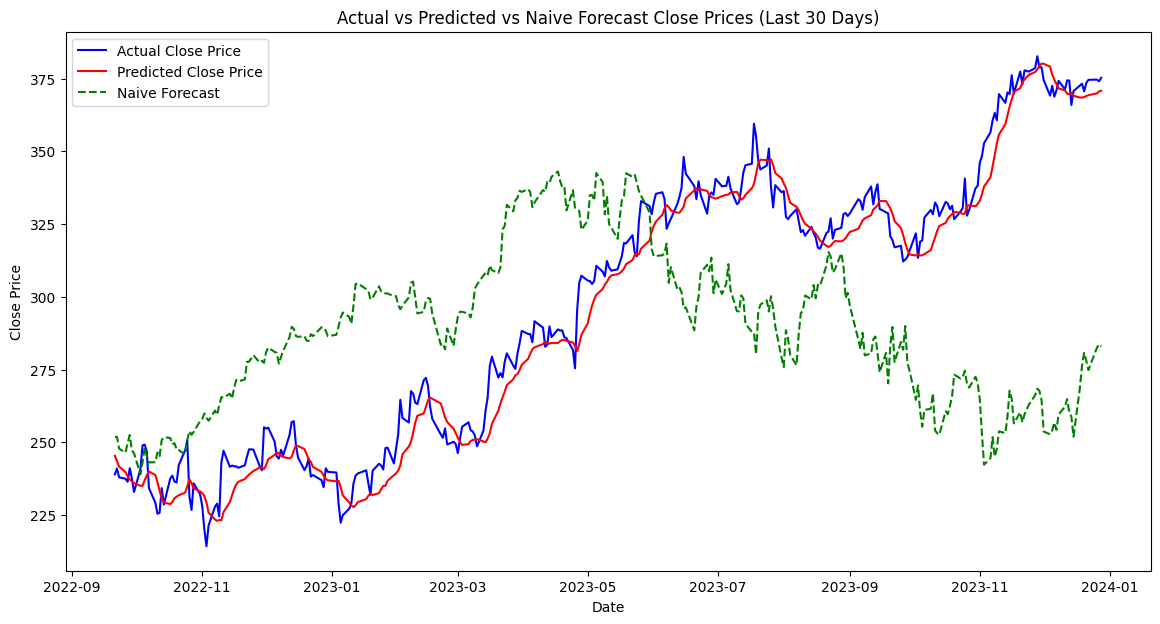

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Generate the Naive Forecast for the test set
naive_forecast = np.roll(y_test_actual, shift=1)
naive_forecast[0] = y_test_actual[0]  # Handle the first value

# Generate the Naive Forecast for the prediction set
# Ensure the length of y_test_actual is not less than y_predict_rescaled
if len(y_test_actual) >= len(y_predict_rescaled):
    naive_forecast_predict = np.roll(y_test_actual[-len(y_predict_rescaled):], shift=1)
    naive_forecast_predict[0] = y_test_actual[-len(y_predict_rescaled)]  # Handle the first value for prediction
else:
    # If y_test_actual is shorter than y_predict_rescaled, handle it differently
    naive_forecast_predict = np.roll(y_test_actual, shift=1)
    naive_forecast_predict[0] = y_test_actual[0]

# Plot Actual vs. Predicted vs. Naive Forecast for the test set
plt.figure(figsize=(14, 7))
plt.plot(time_index, y_test_actual, color='blue', label='Actual Close Price')
plt.plot(time_index, y_test_pred_rescaled, color='red', label='Predicted Close Price')
plt.plot(time_index, naive_forecast, color='green', linestyle='dashed', label='Naive Forecast')
plt.title('Actual vs Predicted vs Naive Forecast Close Prices (Test Set)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Plot Actual vs. Prediction vs. Naive Forecast for the prediction set (last 30 days)
time_index_predict = Data.index[-len(y_predict_rescaled):]
plt.figure(figsize=(14, 7))
plt.plot(time_index_predict[:-1], Data['Close'].iloc[-len(y_predict_rescaled):].values[:-1], color='blue', label='Actual Close Price')
plt.plot(time_index_predict[:-1], y_predict_rescaled[:-1], color='red', label='Predicted Close Price')
plt.plot(time_index_predict[:-1], naive_forecast_predict, color='green', linestyle='dashed', label='Naive Forecast')
plt.title('Actual vs Predicted vs Naive Forecast Close Prices (Last 30 Days)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()